In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams["lines.markersize"] = 2

from lib import *

## Simulating Data

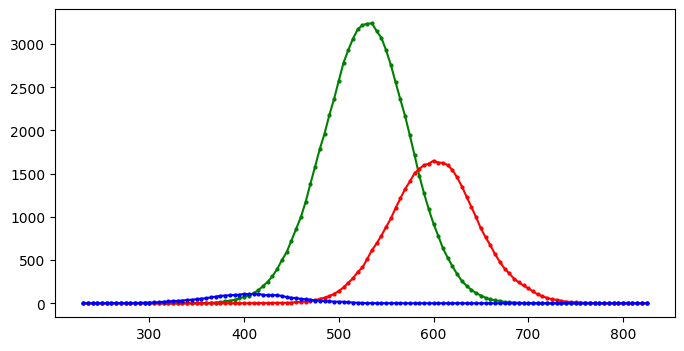

In [2]:
## TWEAK THIS VALUE TO DETERMINE DIMENSIONALITY OF INITIAL DATA
total_num_cells = 10000

num_green = int(total_num_cells * PERCENT_GREEN)
num_red = int(total_num_cells * PERCENT_RED)
num_blue = int(total_num_cells * PERCENT_BLUE)

green_cells = generate_cone_cells(num_green, GREEN_MU, GREEN_SIGMA)
red_cells = generate_cone_cells(num_red, RED_MU, RED_SIGMA)
blue_cells = generate_cone_cells(num_blue, BLUE_MU, BLUE_SIGMA)

all_cells = green_cells + red_cells + blue_cells

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
green_freqs, green_counts = generate_plotting_data(green_cells, 230, 830, 5)
ax.plot(green_freqs, green_counts, 'o-', color='green')

red_freqs, red_counts = generate_plotting_data(red_cells, 230, 830, 5)
ax.plot(red_freqs, red_counts, 'o-', color='red')

blue_freqs, blue_counts = generate_plotting_data(blue_cells, 230, 830, 5)
ax.plot(blue_freqs, blue_counts, 'o-', color='blue')

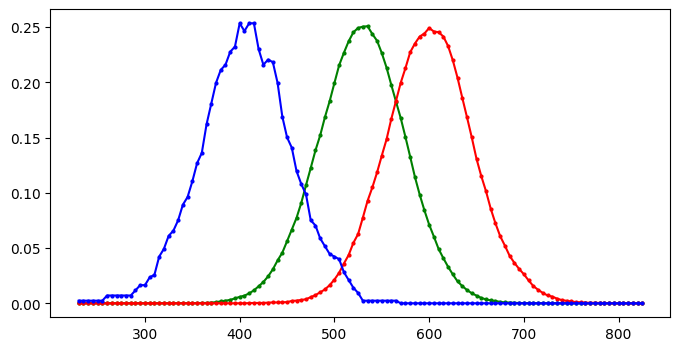

In [3]:
green_counts_normalized = green_counts / np.linalg.norm(green_counts)
red_counts_normalized = red_counts / np.linalg.norm(red_counts)
blue_counts_normalized = blue_counts / np.linalg.norm(blue_counts)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(green_freqs, green_counts_normalized, 'o-', color='green')
ax.plot(red_freqs, red_counts_normalized, 'o-', color='red')
ax.plot(blue_freqs, blue_counts_normalized, 'o-', color='blue')

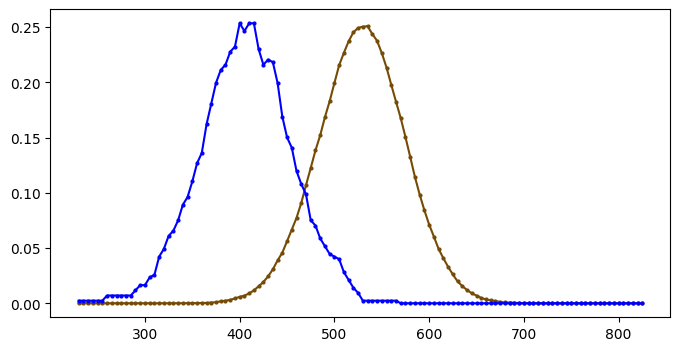

In [5]:
red_green_mu = (RED_MU + GREEN_MU) / 2
red_green_sigma = 50
num_red_green = num_red + num_green

red_green_cells = generate_cone_cells(num_red_green, red_green_mu, red_green_sigma)

red_green_freqs, red_green_counts = generate_plotting_data(red_green_cells, 230, 830, 5)
red_green_counts_normalized = red_green_counts / np.linalg.norm(red_green_counts)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(green_freqs, green_counts_normalized, 'o-', color='#764b05')
ax.plot(blue_freqs, blue_counts_normalized, 'o-', color='blue')

In [6]:
num_data_points = 1000
min_freq = 380
max_freq = 750

print(len(all_cells))

data, colors = sample_frequencies(num_data_points=num_data_points, cells=all_cells, min_freq=min_freq, max_freq=max_freq)

10000


In [11]:
data

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
colors

[<Color.VIOLET: 0>,
 <Color.BLUE: 1>,
 <Color.BLUE: 1>,
 <Color.YELLOW: 3>,
 <Color.RED: 5>,
 <Color.RED: 5>,
 <Color.GREEN: 2>,
 <Color.GREEN: 2>,
 <Color.VIOLET: 0>,
 <Color.GREEN: 2>,
 <Color.RED: 5>,
 <Color.VIOLET: 0>,
 <Color.RED: 5>,
 <Color.VIOLET: 0>,
 <Color.GREEN: 2>,
 <Color.BLUE: 1>,
 <Color.ORANGE: 4>,
 <Color.ORANGE: 4>,
 <Color.BLUE: 1>,
 <Color.RED: 5>,
 <Color.ORANGE: 4>,
 <Color.GREEN: 2>,
 <Color.GREEN: 2>,
 <Color.GREEN: 2>,
 <Color.BLUE: 1>,
 <Color.VIOLET: 0>,
 <Color.GREEN: 2>,
 <Color.BLUE: 1>,
 <Color.GREEN: 2>,
 <Color.YELLOW: 3>,
 <Color.RED: 5>,
 <Color.RED: 5>,
 <Color.GREEN: 2>,
 <Color.RED: 5>,
 <Color.YELLOW: 3>,
 <Color.VIOLET: 0>,
 <Color.RED: 5>,
 <Color.RED: 5>,
 <Color.GREEN: 2>,
 <Color.GREEN: 2>,
 <Color.GREEN: 2>,
 <Color.YELLOW: 3>,
 <Color.BLUE: 1>,
 <Color.YELLOW: 3>,
 <Color.GREEN: 2>,
 <Color.ORANGE: 4>,
 <Color.VIOLET: 0>,
 <Color.BLUE: 1>,
 <Color.BLUE: 1>,
 <Color.GREEN: 2>,
 <Color.ORANGE: 4>,
 <Color.RED: 5>,
 <Color.BLUE: 1>,
 <Color.